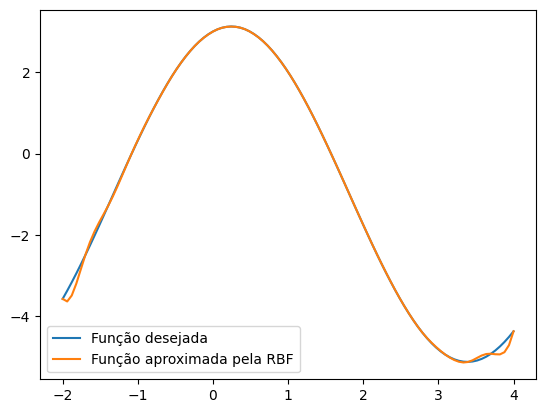

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import Rbf

# Função desejada
def f(x):
    return np.sin(x) + 4*np.cos(x) - 1

# Geração dos pontos de treinamento
x = np.linspace(-2, 4, 21)
y = f(x)

# Criação da rede RBF
rbf = Rbf(x, y, function='gaussian')

# Geração dos pontos de teste
x_test = np.linspace(-2, 4, 100)
y_test = rbf(x_test)

# Plot da função desejada
plt.plot(x_test, f(x_test), label='Função desejada')

# Plot da função aproximada
plt.plot(x_test, y_test, label='Função aproximada pela RBF')

plt.legend()
plt.show()


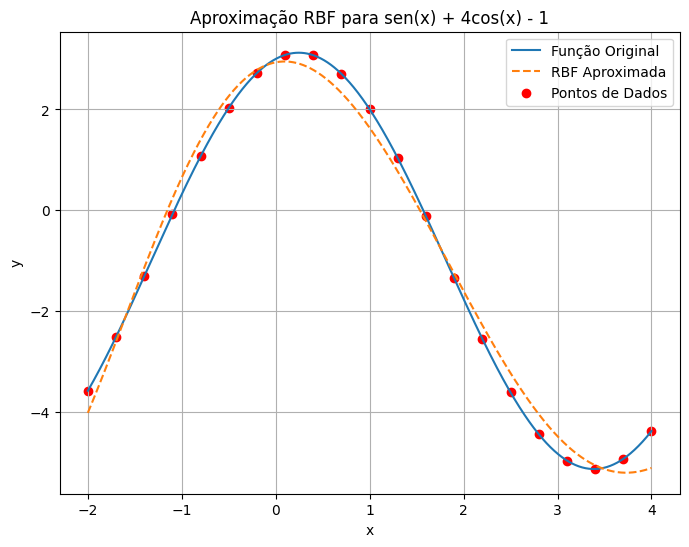

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Função a ser aproximada
def f(x):
    return np.sin(x) + 4 * np.cos(x) - 1

# Gerar 21 pontos no intervalo [-2, 4]
x = np.linspace(-2, 4, 21)
y = f(x)

# Selecionar 4 centros aleatoriamente
np.random.seed(42)  # Para reprodutibilidade
indices = np.random.choice(len(x), 4, replace=False)
centers = x[indices]

# Calcular as distâncias entre os pontos e os centros
distances = np.abs(x[:, None] - centers)

# Parâmetro sigma para as funções de base radial
sigma = np.mean(np.std(distances, axis=0))

# Calcular a matriz de ativação
phi = np.exp(-0.5 * (distances / sigma)**2)

# Calcular os pesos da rede
weights = np.linalg.lstsq(phi, y, rcond=None)[0]

# Definir uma função para prever valores usando a RBF
def predict_rbf(x):
    distances = np.abs(x[:, None] - centers)
    phi = np.exp(-0.5 * (distances / sigma)**2)
    return np.dot(phi, weights)

# Gerar pontos para o gráfico da função aproximada
x_pred = np.linspace(-2, 4, 1000)
y_pred = predict_rbf(x_pred)

# Plotar a função original e a aproximada pela RBF
plt.figure(figsize=(8, 6))
plt.plot(x_pred, f(x_pred), label='Função Original')
plt.plot(x_pred, y_pred, label='RBF Aproximada', linestyle='--')
plt.scatter(x, y, color='red', label='Pontos de Dados')
plt.title('Aproximação RBF para sen(x) + 4cos(x) - 1')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


Epoch [100/1000], Loss: 0.0094
Epoch [200/1000], Loss: 0.0020
Epoch [300/1000], Loss: 0.0007
Epoch [400/1000], Loss: 0.0003
Epoch [500/1000], Loss: 0.0002
Epoch [600/1000], Loss: 0.0002
Epoch [700/1000], Loss: 0.0001
Epoch [800/1000], Loss: 0.0001
Epoch [900/1000], Loss: 0.0001
Epoch [1000/1000], Loss: 0.0001


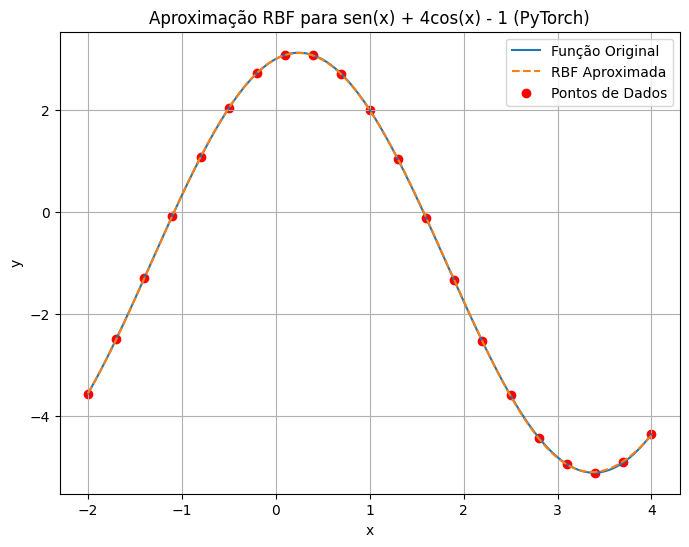

In [6]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

# Definir a função a ser aproximada
def f(x):
    return torch.sin(x) + 4 * torch.cos(x) - 1

# Gerar 21 pontos no intervalo [-2, 4]
x = torch.linspace(-2, 4, 21).reshape(-1, 1)
y = f(x)

# Selecionar 4 centros aleatoriamente
torch.manual_seed(777)  # Para reprodutibilidade
indices = torch.randperm(len(x))[:4]
centers = x[indices]

# Calcular as distâncias entre os pontos e os centros
distances = torch.abs(x - centers.T)

# Parâmetro sigma para as funções de base radial
sigma = torch.mean(torch.std(distances, axis=0))

# Definir a classe da Rede Neural RBF
class RBF(nn.Module):
    def __init__(self, in_features, num_centers):
        super(RBF, self).__init__()
        self.centers = nn.Parameter(centers)
        self.weights = nn.Parameter(torch.randn(num_centers, 1))
        self.sigma = nn.Parameter(sigma)

    def forward(self, x):
        distances = torch.abs(x - self.centers.T)
        phi = torch.exp(-0.5 * (distances / self.sigma)**2)
        return torch.matmul(phi, self.weights)

# Instanciar a Rede Neural RBF
rbf = RBF(in_features=1, num_centers=4)

# Definir a função de perda e o otimizador
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rbf.parameters(), lr=0.1)

# Treinamento da rede
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()
    output = rbf(x)
    loss = criterion(output, y)
    loss.backward()
    optimizer.step()
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}')

# Gerar pontos para o gráfico da função aproximada
x_pred = torch.linspace(-2, 4, 1000).reshape(-1, 1)
with torch.no_grad():
    y_pred = rbf(x_pred)

# Plotar a função original e a aproximada pela RBF
plt.figure(figsize=(8, 6))
plt.plot(x_pred.numpy(), f(x_pred).numpy(), label='Função Original')
plt.plot(x_pred.numpy(), y_pred.numpy(), label='RBF Aproximada', linestyle='--')
plt.scatter(x.numpy(), y.numpy(), color='red', label='Pontos de Dados')
plt.title('Aproximação RBF para sen(x) + 4cos(x) - 1 (PyTorch)')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()
